In [4]:
import pandas as pd
from kacper.project.calculations import *
from kacper.project.data import *
from kacper.project.visualizations import *
import cProfile
import pstats

In [5]:
def main():
    download_bus_data(4, outfilename='test_bus.csv')
    speeding_df = speeding('test_bus.csv', 50, from_file=True)
    map_points(speeding_df, 'warsaw_map.png', (20.8404, 21.2846, 52.0964, 52.3727), 'speeders.png')
    df_bus_stops = download_bus_stops()
    df_of_schedule = add_bus_lines(df_bus_stops)
    df_bus_data = pd.read_csv('test_bus.csv', index_col=0)
    punctuality = late_buses(df_bus_data, df_of_schedule)
    print(f"Example late buses: {punctuality['late'][:10]}, number of late buses found: {len(punctuality['late'])}")
    print(f"Punctual buses: {punctuality['punctual'][:10]},  number of punctual buses found: {len(punctuality['punctual'])}")

Minutes until downloading data is completed: 4
Minutes until downloading data is completed: 3
Minutes until downloading data is completed: 2
Minutes until downloading data is completed: 1
Example late buses: [('146', '1', '19:44:00', '5.9min', '1.9389694901460504km'), ('146', '1', '19:44:00', '4.9min', '1.589039680088872km'), ('146', '1', '19:44:00', '3.82min', '1.2227292518599753km'), ('147', '07', '19:38:00', '0.95min', '1.5691496560162495km'), ('147', '07', '19:38:00', '0.18min', '1.3128076156879371km'), ('147', '07', '19:38:00', '1.12min', '1.2167272939008749km'), ('147', '07', '19:38:00', '2.2min', '1.2505936334113346km'), ('166', '012', '19:35:00', '5.22min', '1.0801661128282023km'), ('509', '8', '19:33:00', '4.07min', '1.1678016189213936km'), ('509', '8', '19:33:00', '5.2min', '1.2959992357536474km')], number of late buses found: 12170
Punctual buses: [('123', '09', '19:42:00', '4.82min', '0.631164580765051km'), ('123', '09', '19:42:00', '3.73min', '0.6778473693641006km'), ('123

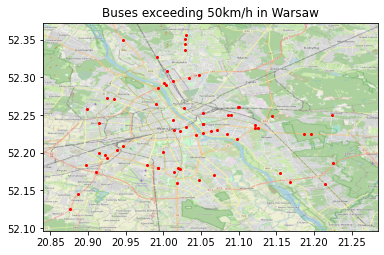

In [6]:
cProfile.run('main()', 'output.dat')
with open('output_time.txt', 'w') as f:
    p = pstats.Stats('output.dat', stream=f)
    p.sort_stats('time').print_stats()